Plot Fig. 1d

In [1]:
import sys
import os
import argparse
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter

from config import CP4FIGDIR
from CP4.make_climato.c1_compute_running_hourly_climato_single_lvl_var import load_single_lvl_var_hclimato
from CP4.make_composites.make_hhee_data import get_files_hhee_data, load_hhee_data
from CP4.make_composites.a1_make_var_field import load_composite_features_hhee
from CP4.plots.p_config import *

Done
Done
Done
Done
Done
Done
Done
Done


In [2]:
ds='CP4A'
res=4
var_ref='twb'
var='twb'
window=6
y0=1997
y1=2006
months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
q_thresh=0.95
t_thresh=26.
min_hw_size=100.  # km2
max_hw_size=1000000.  # km2
sw=[4., 4.]
tw=[-72, 72]
samtime=[12, 12]
n_days=3
meth='cc3d'
cnty=26
regs=['WSahel', 'CSahel', 'ESahel', 'Guinea', 'CAfr']
flabel='d'
cutoff_scale_vsmall=200
cutoff_scale_small=1000
cutoff_scale_medium=2000

In [3]:
regs_sahel = [reg for reg in regs if 'Sahel' in reg]

In [4]:
#~ Get data

out = []

for reg in regs:
    coords = study_regions[reg]
    lat_range = coords[0]
    lon_range = coords[1]
    lat_min = lat_range[0]
    lat_max = lat_range[1]
    lon_min = lon_range[0]
    lon_max = lon_range[1]

    feats = load_composite_features_hhee(ds, res, var, y0, y1, months, t_thresh, q_thresh, n_days, window, sw, tw, lat_range, lon_range, min_hw_size, max_hw_size, meth, cnty)

    out.append(feats)

labels = ['{0} (N={1})'.format(reg, n.shape[0]) for reg, n in zip(regs, out)]

In [5]:
#~ Treat data

df_area = pd.concat([out_.area for out_ in out], axis=1)
df_area.columns = regs

df_sahel = pd.concat([df_area[reg] for reg in regs_sahel]).dropna()
df_sahel.index = range(len(df_sahel))
df_sahel = pd.DataFrame(df_sahel, columns=['Sahel'])
df_area.drop(regs_sahel, axis=1, inplace=True)
df_area = pd.concat([df_area, df_sahel], axis=1, names=[])
df_area = df_area[['Sahel', 'Guinea', 'CAfr']]
df_area_small = df_area[df_area < cutoff_scale_small]


# Compute proportions
ntot = df_area.count().sum()
prop_small = df_area[df_area < cutoff_scale_small].count().sum() / ntot * 100
df_area_sup = df_area[df_area >= cutoff_scale_small]
prop_medium = df_area_sup[df_area_sup < cutoff_scale_medium].count().sum() / ntot * 100

prop_vsmall = df_area[df_area < cutoff_scale_vsmall].count().sum() / ntot * 100

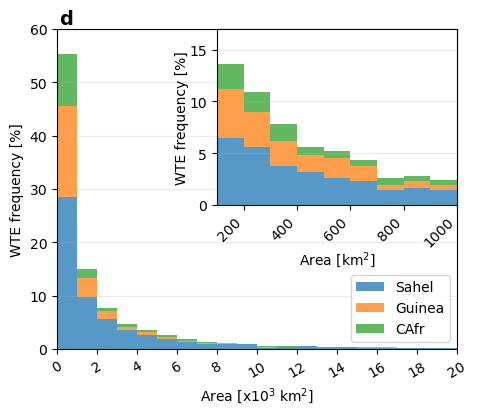

In [6]:
#~ Plot

colors = [list(colors.TABLEAU_COLORS.values())[i] for i in range(len(regs))]

xtcks = np.arange(0, 20000+2000, 2000)
xtlbs = np.arange(0, 20+2, 2)

ytckspct = np.arange(0, 0.6+0.1, 0.1)
ytcks = ntot * ytckspct
ytlbs = ytckspct * 100
ytlbs = ytlbs.astype(int)


fig_areas, ax_areas = plt.subplots()

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.125, top=0.925)

df_area.plot(kind='hist', bins=np.arange(0, 20000+1000, 1000), stacked=True, color=colors, alpha=0.75, ax=ax_areas, label=labels)

ax_areas.text(0.005, 1.015, flabel, weight="bold", fontsize=14, transform=ax_areas.transAxes)

ax_areas.set_xlim(0, 20000)
ax_areas.set_xticks(xtcks)
ax_areas.set_xticklabels(xtlbs, rotation=30)
ax_areas.set_xlabel('Area [x10$^3$ km$^2$]')
ax_areas.set_yticks(ytcks)
ax_areas.set_yticklabels(ytlbs)
ax_areas.set_ylabel('WTE frequency [%]')
ax_areas.grid(axis='y', alpha=0.25)

ax_areas.legend(loc='lower right')

axins_areas = ax_areas.inset_axes([0.4, 0.45, 0.6, 0.55])

df_area_small.plot(kind='hist', bins=np.arange(0, 1000+100, 100), stacked=True, color=colors, alpha=0.75, ax=axins_areas, legend=False)

xtcks = axins_areas.get_xticks()
xtlbs = [int(xt) for xt in xtcks]

ytckspct_ = np.arange(0, 0.15+0.05, 0.05)
ytcks_ = ntot * ytckspct_
ytlbs_ = ytckspct_ * 100
ytlbs_ = ytlbs_.astype(int)

axins_areas.set_xticks(xtcks, xtlbs, rotation=45, ha='right')
axins_areas.set_xlim(100, 1000)
axins_areas.set_xlabel('Area [km$^2$]', labelpad=0.)
axins_areas.set_yticks(ytcks_)
axins_areas.set_yticklabels(ytlbs_)
axins_areas.set_ylim(0., 0.17*ntot)
axins_areas.set_ylabel('WTE frequency [%]', labelpad=0.1)
axins_areas.grid(axis='y', alpha=0.25)

fig_areas.set_size_inches(5., 4.)